In [1]:
#Portfolio Optimsation using Efficient Frontier for Team Dany

In [2]:
#Importing the required libraries
from pandas_datareader import data as web 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
assets =  ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [5]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])


In [6]:
#Get the stock starting date
stockStartDate = '2013-01-01'
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [11]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
    df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']
df


,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.039789,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.824715,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.356062,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.259851,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.303608,13.880000,365.280823
...,...,...,...,...,...
2021-02-10,271.869995,3286.580078,135.389999,563.590027,2095.379883
2021-02-11,270.390015,3262.129883,135.130005,557.590027,2095.889893
2021-02-12,270.500000,3277.709961,135.369995,556.520020,2104.110107


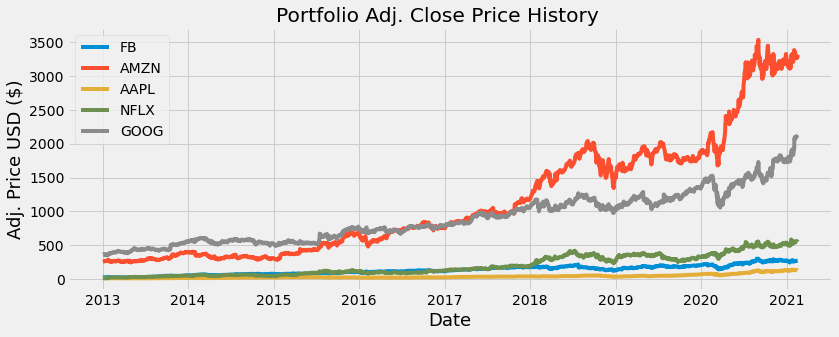

In [14]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [15]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-02-10,0.008981,-0.005573,-0.004558,0.008085,0.005697
2021-02-11,-0.005444,-0.007439,-0.001920,-0.010646,0.000243
2021-02-12,0.000407,0.004776,0.001776,-0.001919,0.003922


In [16]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118348,0.054999,0.045035,0.057045,0.050520
AMZN,0.054999,0.093730,0.040014,0.064061,0.047722
AAPL,0.045035,0.040014,0.082027,0.035626,0.038512
NFLX,0.057045,0.064061,0.035626,0.212770,0.049516
GOOG,0.050520,0.047722,0.038512,0.049516,0.066876


In [25]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06159406586019663

In [26]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.24818151796658153

In [27]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.36181235866871553

In [28]:
#importing libraries for plotting the efficient frontier

In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [30]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [31]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.07226), ('AMZN', 0.31389), ('AAPL', 0.27082), ('NFLX', 0.34303), ('GOOG', 0.0)])
Expected annual return: 41.7%
Annual volatility: 27.4%
Sharpe Ratio: 1.45


(0.41745259825070774, 0.2742412343675832, 1.4492809557514477)

In [32]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))


Discrete allocation: {'FB': 4, 'AMZN': 1, 'AAPL': 32, 'NFLX': 10}
Funds remaining: $896.80
